## Liquid helium Notebook
------
To run on NERSC:

module load python

source activate lims-test

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import darklim

%matplotlib inline

1-fold coincidence:
integral from 0.0001 to 0.5 keV = 4.13e+04 evts/day
= 4.78e-01 evts/s
 
2-fold coincidence:
integral from 0.0001 to 0.5 keV = 1.49e+00 evts/day
= 1.73e-05 evts/s
 
3-fold coincidence:
integral from 0.0001 to 0.5 keV = 3.58e-05 evts/day
= 4.15e-10 evts/s
 
4-fold coincidence:
integral from 0.0001 to 0.5 keV = 4.30e-10 evts/day
= 4.98e-15 evts/s
 


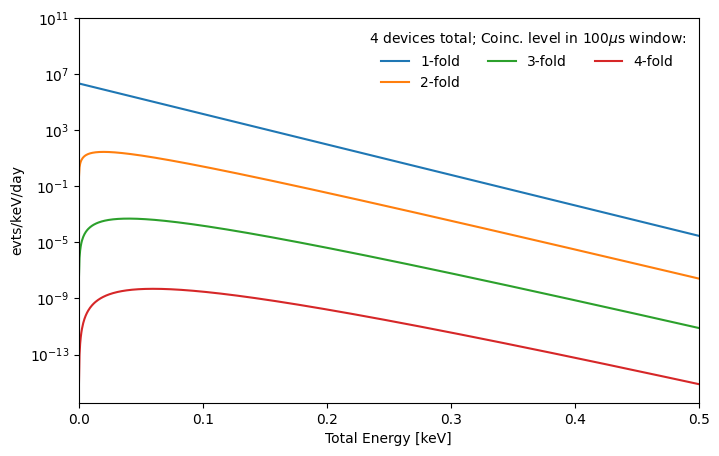

In [2]:
# test the nfold LEE function

fig, ax = plt.subplots(1,figsize=(6,4))

bins = np.linspace(0.0001,0.5,1000)

n_devices = 4
coinc = np.arange(1,5)
window = 100e-6# s
for n in coinc:
    
    print('{}-fold coincidence:'.format(n))
    model = darklim.sensitivity.n_fold_lee(bins,m=n_devices,n=n,w=window)
    
    integral = np.trapz(model,x=bins)
    print('integral from {} to {} keV = {:.2e} evts/day'.format(bins[0],bins[-1],integral))
    print('= {:0.2e} evts/s'.format(integral/24/3600))
    print(' ')
    
    plt.plot(bins,model,label='{:d}-fold'.format(n))

#lhe_mass = 0.010 # kg
#ax.axhline(1*lhe_mass,label='1 DRU in 10g LHe'.format(n),color='black',ls='--') # 1 DRU=1 evt/keV/d/kg
#plt.plot(bins,
    
ax.set_ylabel('evts/keV/day')
ax.set_xlabel('Total Energy [keV]')
ax.set_xlim(0,0.5)
ax.set_yscale('log')
ax.set_ylim(None,1e11)
ax.legend(loc='upper right',frameon=False,title='{:d} devices total;'.format(n_devices)+' Coinc. level in {:0.0f}'.format(window*1e6)+r'$\mu$s window:',ncol=3)

In [9]:
# Detector info setup

time_elapsed = 10 # days
efficiency = 1.0
tm = 'He' # target name
mass_det = 0.010 # mass in kg
energy_res = 0.373e-3 # energy resolution in keV
threshold = 5 * energy_res # threshold

n_devices = 4
coinc = 2
window = 100e-6 # s

print('detector mass is {} kg = {} g'.format(mass_det,mass_det*1000))
print('threshold = {:0.1f} eV'.format(threshold*1000))
print('assuming {:d}-fold coincidence amongst {:d} devices in a {:0.1f} microsecond window'.format(coinc,n_devices,window/1e-6))



detector mass is 0.01 kg = 10.0 g
threshold = 1.9 eV
assuming 2-fold coincidence amongst 4 devices in a 100.0 microsecond window


expect 104.0 evts
created 120.0 evts


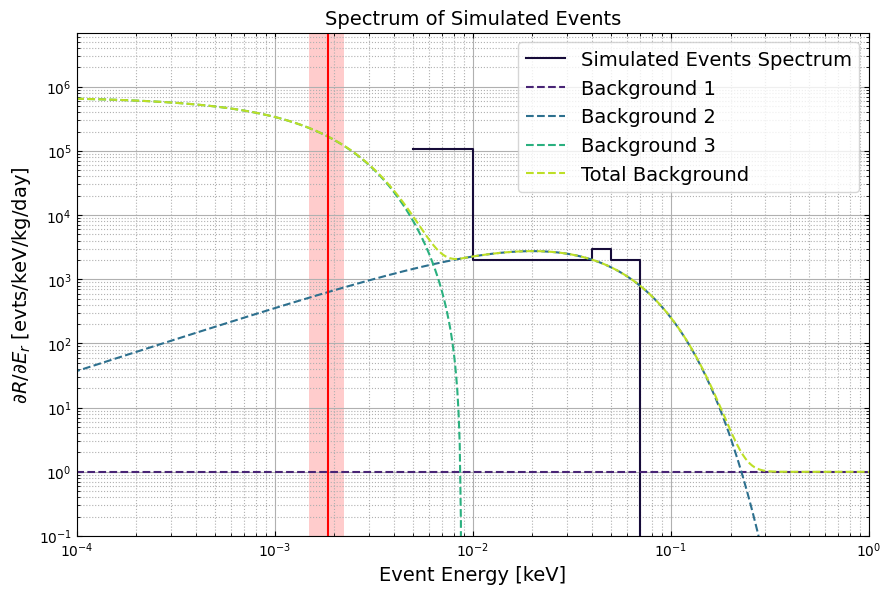

In [12]:
SE = darklim.sensitivity.SensEst(mass_det, time_elapsed, eff=efficiency, tm=tm)

SE.reset_sim()

SE.add_flat_bkgd(1) # flat background of 1 DRU

#SE.add_nfold_lee_bkgd(m=4,n=2,w=window)
SE.add_nfold_lee_bkgd(m=n_devices,n=coinc,w=window)

SE.add_dm_bkgd(0.05, 2e-38)

gen_evts = SE.generate_background(1, plot_bkgd=True, verbose=True)
ax = plt.gca()
#plt.ylim(0.1,50)
ax.set_xscale('log')
ax.set_xlim(1e-4,1)
ax.axvline(threshold,ls='-',color='red')
ax.axvspan(threshold-energy_res,threshold+energy_res,facecolor='red',alpha=0.2)

## Reset and run the sens projection

In [13]:
SE.reset_sim()

SE.add_flat_bkgd(1) # flat background of 1 DRU
SE.add_nfold_lee_bkgd(m=n_devices,n=coinc,w=window)



exposure was  0.1  kg-days
masses =  [0.01       0.01460022 0.02131663 0.03112274 0.04543988 0.0663432
 0.09686251 0.14142136 0.20647824 0.30146269 0.44014204 0.6426169
 0.93823456 1.36984273 2.        ]
ULs =  [           inf            inf            inf 3.38729315e-38
 3.43975327e-39 2.15608858e-39 3.12217190e-39 6.05334157e-39
 1.34760236e-38 2.53229241e-38 2.19582471e-38 1.26805478e-38
 1.09800324e-38 1.44665969e-38 1.92334592e-38]


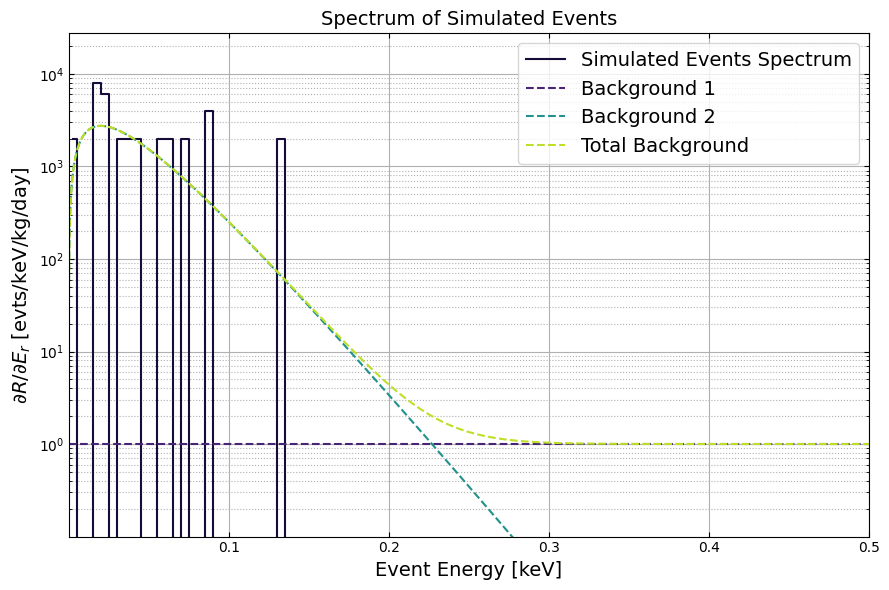

In [14]:
# run the simulation 

#m_dms=np.geomspace(0.1, 2, num=10)

m_dm, sig = SE.run_sim(
    threshold,
    0.5,
    e_low=1e-5,
    #m_dms=np.array([0.5]),
    m_dms=np.geomspace(0.01, 2, num=15),
    nexp=10, # increase for a better estimate, 1 is generally used for diagnostics
    npts=1000,
    plot_bkgd=True,
    res=None,
    verbose=False
)

print('\nexposure was ',SE.exposure,' kg-days')
print('masses = ',m_dm)
print('ULs = ',sig)

Plot results

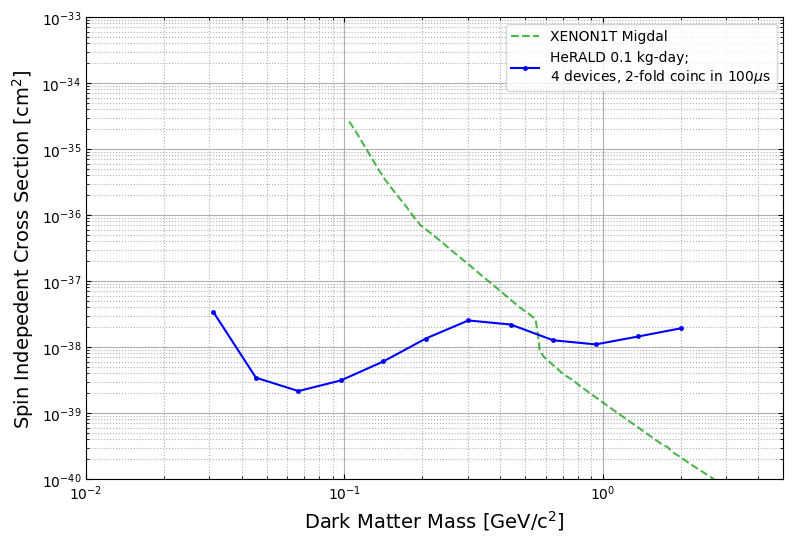

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))

x1tmig = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/XENON1T-Migdal.txt')
#cresst = np.loadtxt('/global/cfs/cdirs/lz/users/haselsco/TESSERACT_Limits/snowmass2021-wp-cf1-neutrinofloor/data/published/SI/CRESST.txt')

plt.plot(*(x1tmig.T),color=(0.,0.6,0.,0.7),ls='--',label='XENON1T Migdal')
#plt.plot(*(cresst.T),color=(0.8,0.1,0.1,0.7),label='CRESST')

lab = 'HeRALD {:0.1f} kg-day;\n{:d} devices, {:d}-fold coinc in {:0.0f}$\mu$s'.format(SE.exposure,n_devices,coinc,window/1e-6)
plt.plot(m_dm, sig, color='b',marker='.',ms=5,label=lab)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-40, 1e-33)
ax.set_xlim(0.01, 5)
ax.set_xlabel("Dark Matter Mass [GeV/c$^2$]", fontsize=14)
ax.set_ylabel("Spin Indepedent Cross Section [cm$^2$]", fontsize=14)
#ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

ax.legend(loc='upper right',frameon=True)

In [16]:
# save results to txt file
outname = 'HeRALD_{:0.1f}kgday_{:d}device_{:d}fold_{:0.0f}mus.txt'.format(SE.exposure,n_devices,coinc,window/1e-6)

tot = np.column_stack( (m_dm, sig) )
np.savetxt(outname,tot,fmt=['%.5e','%0.5e'] ,delimiter=' ')

